In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
import xgboost as xgb

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Credit score classification:

The extensive dataset of customer banking and credit-related details collected over the years. The goal is to develop ML model capable of categorizing individuals into predefined credit score, thereby minimizing manual effort and improving efficiency.

Objective
Build a machine learning model that can classify a person's credit score based on their credit-related information.

In [2]:
df = pd.read_csv('cleaned_df.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94496 entries, 0 to 94495
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   month                     94496 non-null  object 
 1   age                       94496 non-null  float64
 2   occupation                94496 non-null  object 
 3   annual_income             94496 non-null  float64
 4   num_bank_accounts         94496 non-null  float64
 5   num_credit_card           94496 non-null  float64
 6   interest_rate             94496 non-null  float64
 7   num_of_loan               94496 non-null  float64
 8   type_of_loan              94496 non-null  object 
 9   delay_from_due_date       94496 non-null  int64  
 10  num_of_delayed_payment    94496 non-null  float64
 11  changed_credit_limit      94496 non-null  float64
 12  num_credit_inquiries      94496 non-null  float64
 13  credit_mix                94496 non-null  object 
 14  outsta

In [4]:
df.head()

,month,age,occupation,annual_income,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,type_of_loan,delay_from_due_date,...,credit_mix,outstanding_debt,credit_utilization_ratio,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score,credit_history_months
0,January,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,"['Auto Loan', 'Credit-Builder Loan', 'Personal...",3,...,Good,809.98,26.822620,No,49.574949,80.415300,High_spent_Small_value_payments,312.494089,Good,265.0
1,February,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,"['Auto Loan', 'Credit-Builder Loan', 'Personal...",-1,...,Good,809.98,31.944960,No,49.574949,118.280220,Low_spent_Large_value_payments,284.629162,Good,265.0
2,March,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,"['Auto Loan', 'Credit-Builder Loan', 'Personal...",3,...,Good,809.98,28.609352,No,49.574949,81.699524,Low_spent_Medium_value_payments,331.209863,Good,267.0
3,April,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,"['Auto Loan', 'Credit-Builder Loan', 'Personal...",5,...,Good,809.98,31.377862,No,49.574949,199.458070,Low_spent_Small_value_payments,223.451310,Good,268.0
4,May,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,"['Auto Loan', 'Credit-Builder Loan', 'Personal...",6,...,Good,809.98,24.797347,No,49.574949,41.420155,High_spent_Medium_value_payments,341.489231,Good,269.0


In [5]:
pd.options.display.float_format = '{:.2f}'.format

 Let's visualize and see distribution of numeric features:

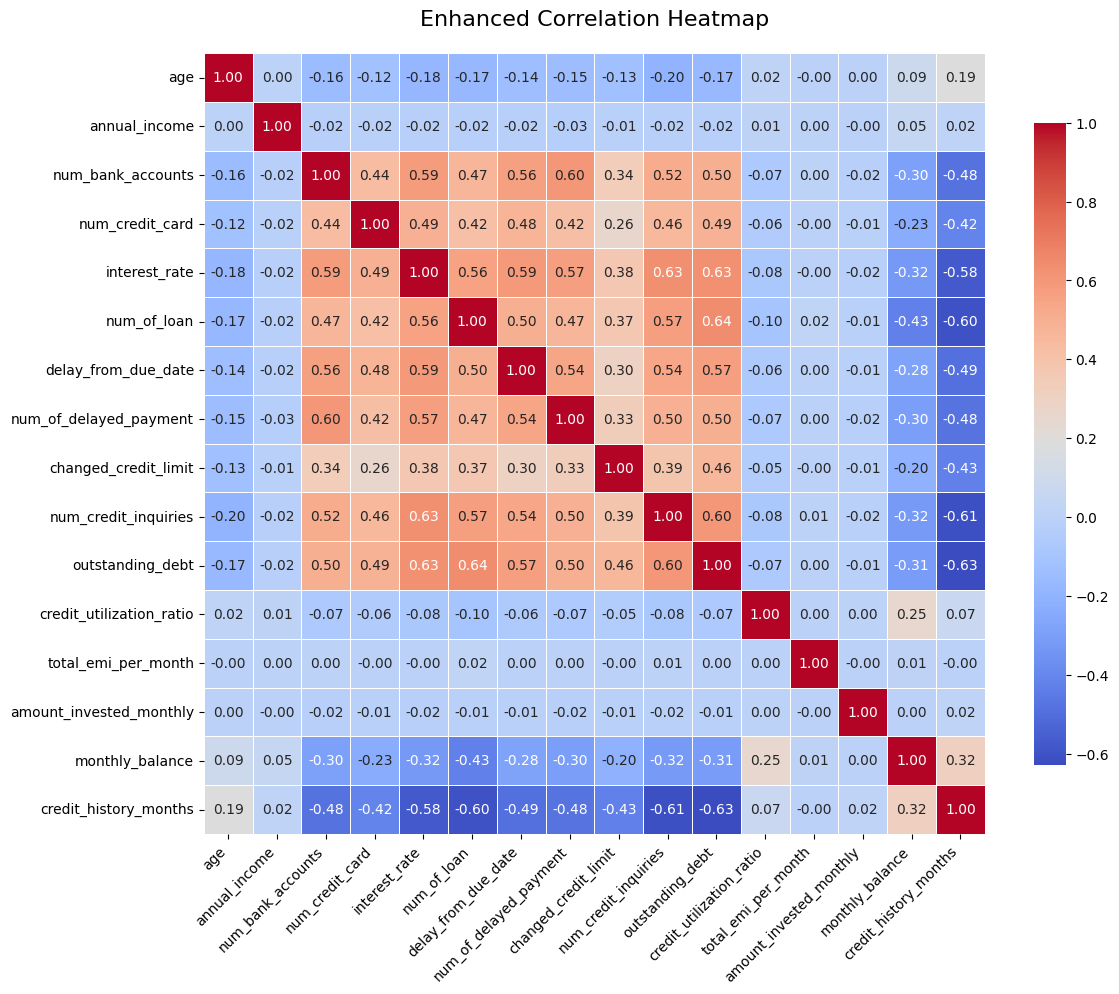

In [10]:
# Select numeric columns from the dataframe
numeric_df = df.select_dtypes(include="number")

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))

sns.heatmap(
    correlation_matrix, 
    annot=True,       
    fmt='.2f',        
    cmap='coolwarm',  
    square=True,      
    linewidths=0.5,   
    cbar_kws={'shrink': 0.8}  
)

plt.title("Enhanced Correlation Heatmap", fontsize=16, pad=20)
plt.xticks(fontsize=10, rotation=45, ha="right")  
plt.yticks(fontsize=10, rotation=0)  


plt.tight_layout()
plt.show()

In [6]:
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

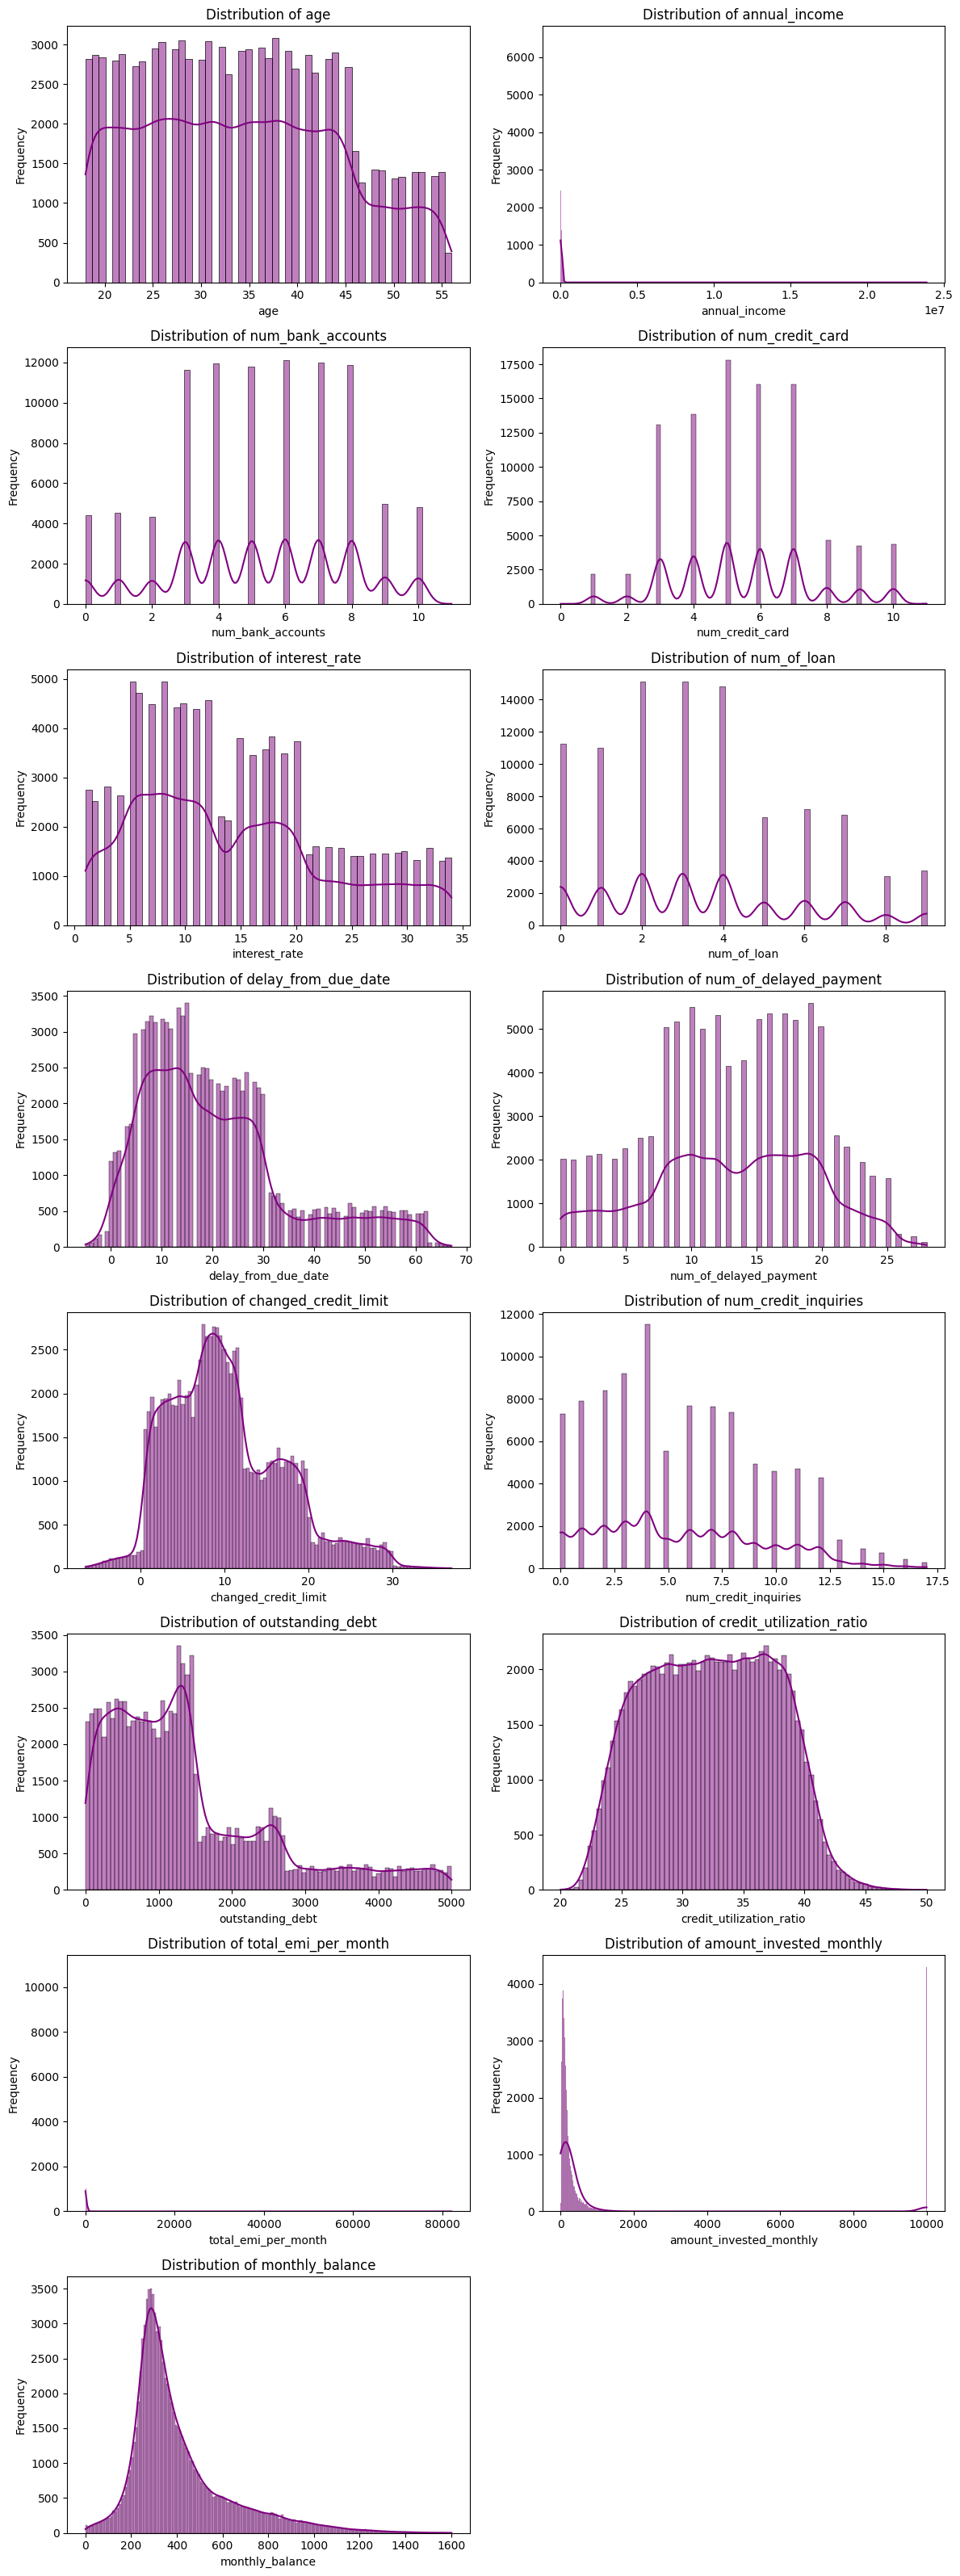

In [8]:
features = numeric_columns[:-1] 

n_cols = 2  
n_rows = -(-len(features) // n_cols)  

# Create a figure and axes for the plots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 4))
plt.subplots_adjust(hspace=0.5, wspace=0.3)  

axes = axes.flatten()

# Plot each feature's histogram
for i, feature in enumerate(features):
    sns.histplot(data=df, x=feature, kde=True, ax=axes[i], color='purple', edgecolor='black') 
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots (if the number of plots is less than n_rows * n_cols)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Show the plots
plt.tight_layout()
plt.show()

Train/Test/Validation split:

In [36]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [37]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [38]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56697 entries, 0 to 56696
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   month                     56697 non-null  object 
 1   age                       56697 non-null  float64
 2   occupation                56697 non-null  object 
 3   annual_income             56697 non-null  float64
 4   num_bank_accounts         56697 non-null  float64
 5   num_credit_card           56697 non-null  float64
 6   interest_rate             56697 non-null  float64
 7   num_of_loan               56697 non-null  float64
 8   type_of_loan              56697 non-null  object 
 9   delay_from_due_date       56697 non-null  int64  
 10  num_of_delayed_payment    56697 non-null  float64
 11  changed_credit_limit      56697 non-null  float64
 12  num_credit_inquiries      56697 non-null  float64
 13  credit_mix                56697 non-null  object 
 14  outsta

In [39]:
le = LabelEncoder()

In [40]:
# Encode target variable for each dataset
y_train = le.fit_transform(df_train.credit_score.values)
y_val = le.transform(df_val.credit_score.values)
y_test = le.transform(df_test.credit_score.values)

# Check unique classes
print("Classes:", le.classes_)

Classes: ['Good' 'Poor' 'Standard']


In [41]:
#Check for class distribution:

print("Unique classes in y_train:", np.unique(y_train))
print("Unique classes in y_val:", np.unique(y_val))
print("Unique classes in y_test:", np.unique(y_test))

Unique classes in y_train: [0 1 2]
Unique classes in y_val: [0 1 2]
Unique classes in y_test: [0 1 2]


In [42]:
del df_train['credit_score']
del df_val['credit_score']
del df_test['credit_score']

In [43]:
len(df_train), len(df_val), len(df_test)

(56697, 18899, 18900)

# Linear classification:

In [44]:
# Step 1: Prepare Training Data
train_dicts = df_train.fillna(0).to_dict(orient='records')
dv = DictVectorizer(sparse=False) 
X_train = dv.fit_transform(train_dicts)

In [45]:
# Step 2: Train Multiclass Logistic Regression
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500, random_state=42)
logreg.fit(X_train, y_train)


d:\MLZoomcamp\Mid term project\midterm_project\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\MLZoomcamp\Mid term project\midterm_project\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500, multi_class='multinomial', random_state=42)

In [46]:
# Step 3: Prepare Validation Data
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [47]:
# Step 4: Predict Probabilities and Evaluate
y_pred_val = logreg.predict(X_val)

In [48]:
# Classification Report for Validation
print("Classification Report (Validation):")
print(classification_report(y_val, y_pred_val))

Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.14      0.00      0.00      3542
           1       0.50      0.27      0.35      5307
           2       0.54      0.86      0.67     10050

    accuracy                           0.53     18899
   macro avg       0.39      0.38      0.34     18899
weighted avg       0.45      0.53      0.45     18899



In [49]:
# Optional: Calculate ROC AUC for Multiclass
# Convert y_val to one-hot encoding for ROC AUC
y_val_binarized = label_binarize(y_val, classes=logreg.classes_)
y_pred_val_prob = logreg.predict_proba(X_val)


In [50]:
roc_auc = roc_auc_score(y_val_binarized, y_pred_val_prob, multi_class='ovr')
print(f"Validation ROC AUC (Multiclass): {roc_auc:.4f}")

Validation ROC AUC (Multiclass): 0.6548


# Decision Tree for Multiclass Classification:

In [52]:
# Train Decision Tree
dt = DecisionTreeClassifier(max_depth=5, random_state=42, class_weight='balanced')
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42)

In [53]:
# Predict on Validation Data
y_pred_val = dt.predict(X_val)

In [54]:
# Predict on Training Data (Optional)
y_pred_train = dt.predict(X_train)

In [55]:
# Classification Report for Validation
print("Validation Classification Report:")
print(classification_report(y_val, y_pred_val, target_names=le.classes_))

Validation Classification Report:
              precision    recall  f1-score   support

        Good       0.52      0.83      0.64      3542
        Poor       0.61      0.79      0.69      5307
    Standard       0.86      0.55      0.67     10050

    accuracy                           0.67     18899
   macro avg       0.66      0.72      0.67     18899
weighted avg       0.73      0.67      0.67     18899



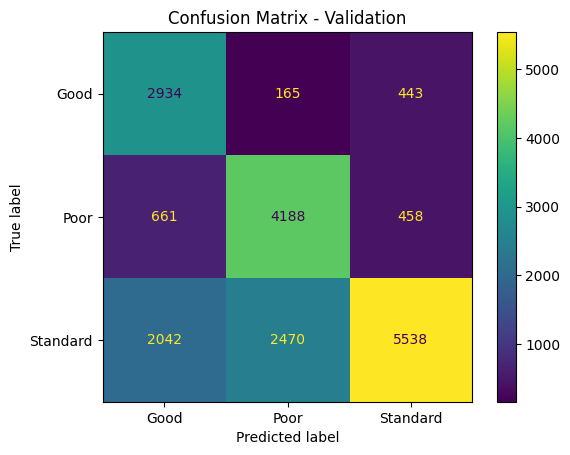

In [56]:
# Confusion Matrix
cm = confusion_matrix(y_val, y_pred_val, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot()
plt.title("Confusion Matrix - Validation")
plt.show()

In [63]:
# Binarize the target labels
y_val_binarized = label_binarize(y_val, classes=dt.classes_)

# Predict probabilities for all classes
y_pred_proba = dt.predict_proba(X_val)

# Compute ROC AUC using one-vs-rest approach
roc_auc = roc_auc_score(y_val_binarized, y_pred_proba, multi_class="ovr")
print(f"ROC AUC (Multiclass): {roc_auc:.4f}")

ROC AUC (Multiclass): 0.8339


Hyper parameter tuning:

In [66]:
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]

In [67]:
for depth in depths: 
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42, class_weight='balanced')
    dt.fit(X_train, y_train)

    y_val_binarized = label_binarize(y_val, classes=dt.classes_)

    # Predict probabilities for all classes
    y_pred_proba = dt.predict_proba(X_val)

    # Compute ROC AUC using one-vs-rest approach
    roc_auc = roc_auc_score(y_val_binarized, y_pred_proba, multi_class="ovr")
    
    print('%4s -> %.3f' % (depth, roc_auc))

   1 -> 0.670
   2 -> 0.779
   3 -> 0.803
   4 -> 0.824
   5 -> 0.834
   6 -> 0.840
  10 -> 0.855
  15 -> 0.849
  20 -> 0.836
None -> 0.784


In [ ]:
# The best result with depth 10

In [68]:
scores = []

for depth in [6, 10, 15]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=depth, random_state=42, class_weight='balanced')
        dt.fit(X_train, y_train)

        y_val_binarized = label_binarize(y_val, classes=dt.classes_)

        # Predict probabilities for all classes
        y_pred_proba = dt.predict_proba(X_val)

        # Compute ROC AUC using one-vs-rest approach
        roc_auc = roc_auc_score(y_val_binarized, y_pred_proba, multi_class="ovr")
    
      
        
        scores.append((depth, s, roc_auc))

In [69]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

In [70]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc          
max_depth          6    10   15
min_samples_leaf               
1                0.84 0.85 0.85
5                0.84 0.85 0.85
10               0.84 0.85 0.85
15               0.84 0.85 0.85
20               0.84 0.85 0.85
100              0.84 0.85 0.85
200              0.84 0.85 0.85
500              0.84 0.85 0.85

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

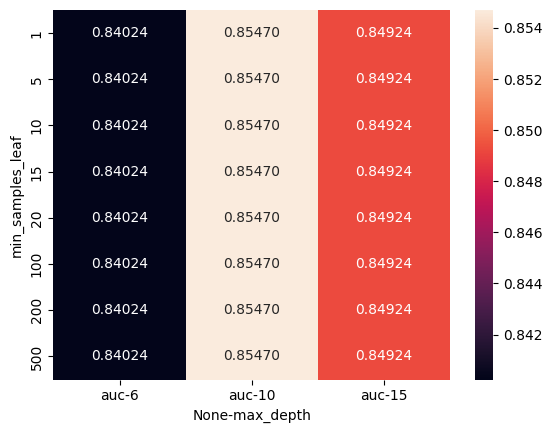

In [72]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".5f")

# Random Forest for Multiclass Classification:

In [ ]:
# Binarize y_val for multiclass ROC AUC
y_val_binarized = label_binarize(y_val, classes=np.unique(y_train))

In [82]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n,random_state=42)
    rf.fit(X_train, y_train)

    y_pred_proba = rf.predict_proba(X_val)

    # Calculate ROC AUC for multiclass
    auc = roc_auc_score(y_val_binarized, y_pred_proba, multi_class='ovr')
    
    scores.append((n, auc))

In [83]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])

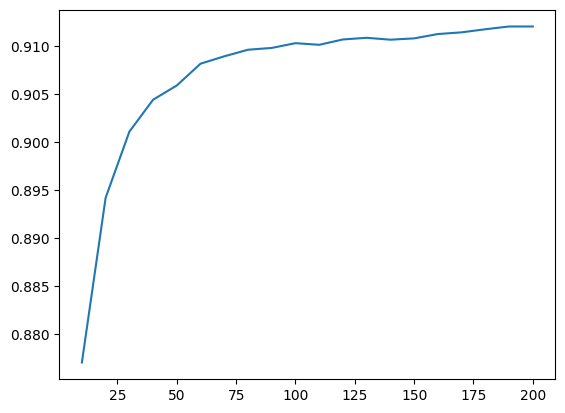

In [84]:
plt.plot(df_scores.n_estimators, df_scores.auc)

In [85]:
scores = []

# Iterate through a range of n_estimators
for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=42)
        rf.fit(X_train, y_train)

        # Predict probabilities for all classes
        y_pred_proba = rf.predict_proba(X_val)

        # Calculate ROC AUC for multiclass
        auc = roc_auc_score(y_val_binarized, y_pred_proba, multi_class='ovr')
        
        # Append n_estimators and the AUC score
        scores.append((d,n, auc))

In [86]:
scores

[(5, 10, np.float64(0.7730112846448934)),
 (5, 20, np.float64(0.7761187448665033)),
 (5, 30, np.float64(0.7792746557770475)),
 (5, 40, np.float64(0.7824200674063105)),
 (5, 50, np.float64(0.780523658098288)),
 (5, 60, np.float64(0.7796056383186776)),
 (5, 70, np.float64(0.7786453243043535)),
 (5, 80, np.float64(0.7796057164005248)),
 (5, 90, np.float64(0.778820068044003)),
 (5, 100, np.float64(0.779963449459124)),
 (5, 110, np.float64(0.7792461707431532)),
 (5, 120, np.float64(0.7812597254042375)),
 (5, 130, np.float64(0.7804390786898331)),
 (5, 140, np.float64(0.7797737309325194)),
 (5, 150, np.float64(0.7809533011976472)),
 (5, 160, np.float64(0.7804652950066523)),
 (5, 170, np.float64(0.7804634733323392)),
 (5, 180, np.float64(0.7803346051739842)),
 (5, 190, np.float64(0.7806718416900525)),
 (5, 200, np.float64(0.7797992727615123)),
 (10, 10, np.float64(0.77926378738857)),
 (10, 20, np.float64(0.7844107642440701)),
 (10, 30, np.float64(0.7888326420415139)),
 (10, 40, np.float64(0.79

In [87]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

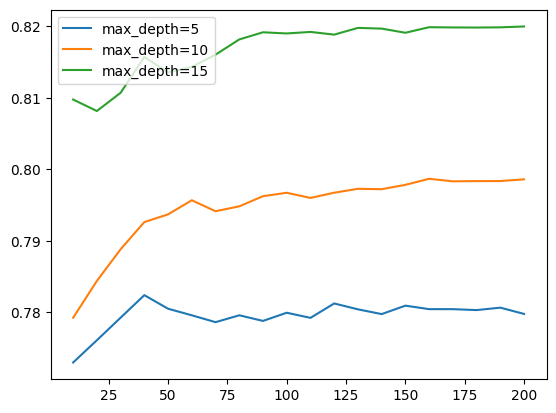

In [88]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()

In [89]:
max_depth = 15

In [90]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=42)
        rf.fit(X_train, y_train)

        # Predict probabilities for all classes
        y_pred_proba = rf.predict_proba(X_val)

        # Calculate ROC AUC for multiclass
        auc = roc_auc_score(y_val_binarized, y_pred_proba, multi_class='ovr')
                
        scores.append((s, n, auc))

In [91]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

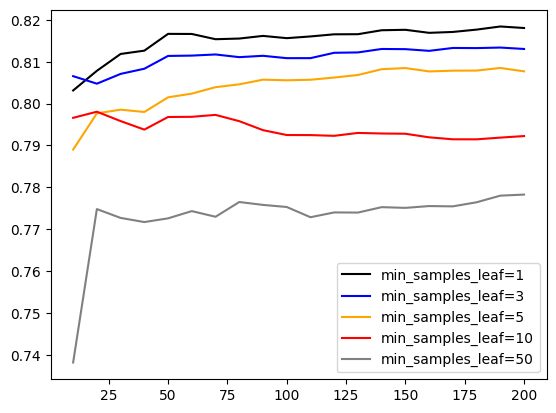

In [92]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

In [93]:
min_samples_leaf = 50

In [94]:
n = 200

In [95]:
#Model RF with best parameters:
rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=min_samples_leaf,
                                    random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=50, n_estimators=200,
                       random_state=42)

# XGBoost Classifier :

In [105]:
# Step 1: Train an XGBClassifier
xgb_clf = XGBClassifier(
    objective='multi:softprob',  # For multiclass classification
    num_class=len(np.unique(y_train)),  # Number of classes
    n_estimators=50,              # Number of trees
    max_depth=6,                  # Maximum tree depth
    learning_rate=0.3,            # Learning rate (eta)
    random_state=1                # Random seed for reproducibility
)

In [106]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

In [107]:
# Step 2: Predict on Validation Data
y_pred_val = xgb_clf.predict(X_val)  # Predicted class labels
y_pred_val_proba = xgb_clf.predict_proba(X_val)  # Predicted probabilities


In [108]:
# Binarize y_val for multiclass ROC AUC
y_val_binarized = label_binarize(y_val, classes=np.unique(y_train))

roc_auc = roc_auc_score(y_val_binarized, y_pred_val_proba, multi_class="ovr")
print(f"Validation ROC AUC (Multiclass): {roc_auc:.4f}")

Validation ROC AUC (Multiclass): 0.8769


# Hyperparameter tuning:

In [115]:
# Binarize y_val for multiclass ROC AUC
y_val_binarized = label_binarize(y_val, classes=np.unique(y_train))

# Placeholder for scores
scores = {}

In [116]:
# Fix other parameters
fixed_params = {
    'learning_rate': 0.1,
    'n_estimators': 100,
    'min_child_weight': 1,
    'objective': 'multi:softprob',
    'num_class': len(np.unique(y_train)),
    'random_state': 42,
    'use_label_encoder': False
}

In [121]:
# 1. Tuning max_depth
scores['max_depth'] = []

for max_depth in [3, 6, 9, 12]:
    print(f"Tuning max_depth={max_depth}...")
    xgb_clf = XGBClassifier(max_depth=max_depth, **fixed_params)
    xgb_clf.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

    # Predict probabilities
    y_pred_proba = xgb_clf.predict_proba(X_val)
    
    # Calculate AUC
    roc_auc = roc_auc_score(y_val_binarized, y_pred_proba, multi_class='ovr')
    scores['max_depth'].append({'max_depth': max_depth, 'val_auc': roc_auc})
    

Tuning max_depth=3...


d:\MLZoomcamp\Mid term project\midterm_project\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:40:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tuning max_depth=6...


d:\MLZoomcamp\Mid term project\midterm_project\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:46:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tuning max_depth=9...


d:\MLZoomcamp\Mid term project\midterm_project\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:53:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tuning max_depth=12...


d:\MLZoomcamp\Mid term project\midterm_project\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:00:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [122]:
# Convert to DataFrame
df_scores = pd.DataFrame(scores)
print(df_scores)

                                          max_depth
0   {'max_depth': 3, 'val_auc': 0.8579841384632901}
1    {'max_depth': 6, 'val_auc': 0.875081952992335}
2   {'max_depth': 9, 'val_auc': 0.8913440726604293}
3  {'max_depth': 12, 'val_auc': 0.9063437171882631}


In [ ]:
#tuning learning rate:

In [123]:
# Convert to DataFrame for visualization
df_max_depth = pd.DataFrame(scores['max_depth'])

In [125]:
# Update fixed parameters with the best max_depth
fixed_params['max_depth'] = 12

In [130]:
# Ensure learning_rate is not in fixed_params
fixed_params.pop('learning_rate', None)

0.1

In [126]:
# Placeholder for learning_rate scores
scores_learning_rate = []

In [132]:
# Tune learning_rate
for learning_rates in [0.01, 0.05, 0.1, 0.2, 0.3]:
    print(f"Tuning learning_rate={learning_rates}...")
    xgb_clf = XGBClassifier(learning_rate=learning_rates, **fixed_params)
    
    # Fit the model
    xgb_clf.fit(
        X_train,
        y_train,
        eval_set=[(X_val, y_val)],
        verbose=False
    )
    
    # Predict probabilities
    y_pred_proba = xgb_clf.predict_proba(X_val)
    
    # Calculate AUC
    roc_auc = roc_auc_score(y_val_binarized, y_pred_proba, multi_class='ovr')
    scores_learning_rate.append({'learning_rate': learning_rates, 'val_auc': roc_auc})

Tuning learning_rate=0.01...


d:\MLZoomcamp\Mid term project\midterm_project\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:12:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tuning learning_rate=0.05...


d:\MLZoomcamp\Mid term project\midterm_project\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:21:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tuning learning_rate=0.1...


d:\MLZoomcamp\Mid term project\midterm_project\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tuning learning_rate=0.2...


d:\MLZoomcamp\Mid term project\midterm_project\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:36:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tuning learning_rate=0.3...


d:\MLZoomcamp\Mid term project\midterm_project\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:44:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [133]:
# Convert scores to DataFrame
df_learning_rate = pd.DataFrame(scores_learning_rate)

# Display results
print(df_learning_rate)

   learning_rate  val_auc
0           0.01     0.88
1           0.05     0.90
2           0.10     0.91
3           0.20     0.91
4           0.30     0.91


#Tuning min child weight:

In [140]:
# Update fixed parameters with the best learning_rate
fixed_params['learning_rate'] = 0.3

In [141]:
# Ensure learning_rate is not in fixed_params
fixed_params.pop('min_child_weight', None)

In [142]:
# Placeholder for min_child_weight scores
scores_min_child_weight = []

In [143]:
# Tune min_child_weight
for min_child_weight in [1, 5, 10, 20]:
    print(f"Tuning min_child_weight={min_child_weight}...")
    xgb_clf = XGBClassifier(min_child_weight=min_child_weight, **fixed_params)
    
    # Fit the model
    xgb_clf.fit(
        X_train,
        y_train,
        eval_set=[(X_val, y_val)],
        verbose=False
    )
    
    # Predict probabilities
    y_pred_proba = xgb_clf.predict_proba(X_val)
    
    # Calculate AUC
    roc_auc = roc_auc_score(y_val_binarized, y_pred_proba, multi_class='ovr')
    scores_min_child_weight.append({'min_child_weight': min_child_weight, 'val_auc': roc_auc})

Tuning min_child_weight=1...


d:\MLZoomcamp\Mid term project\midterm_project\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:23:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tuning min_child_weight=5...


d:\MLZoomcamp\Mid term project\midterm_project\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:31:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tuning min_child_weight=10...


d:\MLZoomcamp\Mid term project\midterm_project\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:38:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tuning min_child_weight=20...


d:\MLZoomcamp\Mid term project\midterm_project\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:47:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [144]:
# Convert scores to DataFrame
df_min_child_weight = pd.DataFrame(scores_min_child_weight)

In [146]:
# Display results
print(df_min_child_weight)

   min_child_weight  val_auc
0                 1     0.91
1                 5     0.92
2                10     0.92
3                20     0.92


In [ ]:
#Tuning of:
#subsample and colsample_bytree
#lambda and alpha

In [147]:
# Update fixed parameters with best previous values
fixed_params.update({
    'min_child_weight': 20,    
})

In [148]:
fixed_params

{'n_estimators': 100,
 'objective': 'multi:softprob',
 'num_class': 3,
 'random_state': 42,
 'use_label_encoder': False,
 'max_depth': 12,
 'learning_rate': 0.3,
 'min_child_weight': 20}

In [ ]:
scores_sampling = []

In [150]:
# Tune subsample and colsample_bytree
for subsample in [0.5, 0.7, 0.9, 1.0]:
    for colsample_bytree in [0.3, 0.5, 0.7, 1.0]:
        print(f"Tuning subsample={subsample}, colsample_bytree={colsample_bytree}...")
        xgb_clf = XGBClassifier(
            subsample=subsample,
            colsample_bytree=colsample_bytree,
            **fixed_params
        )
        
        # Fit the model
        xgb_clf.fit(
            X_train,
            y_train,
            eval_set=[(X_val, y_val)],
            verbose=False
        )
        
        # Predict probabilities
        y_pred_proba = xgb_clf.predict_proba(X_val)
        
     
        roc_auc = roc_auc_score(y_val_binarized, y_pred_proba, multi_class='ovr')
        scores_sampling.append({
            'subsample': subsample,
            'colsample_bytree': colsample_bytree,
            'val_auc': roc_auc
        })



Tuning subsample=0.5, colsample_bytree=0.3...


d:\MLZoomcamp\Mid term project\midterm_project\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:05:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tuning subsample=0.5, colsample_bytree=0.5...


d:\MLZoomcamp\Mid term project\midterm_project\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:12:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tuning subsample=0.5, colsample_bytree=0.7...


d:\MLZoomcamp\Mid term project\midterm_project\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:20:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tuning subsample=0.5, colsample_bytree=1.0...


d:\MLZoomcamp\Mid term project\midterm_project\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:28:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tuning subsample=0.7, colsample_bytree=0.3...


d:\MLZoomcamp\Mid term project\midterm_project\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:35:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tuning subsample=0.7, colsample_bytree=0.5...


d:\MLZoomcamp\Mid term project\midterm_project\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:43:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tuning subsample=0.7, colsample_bytree=0.7...


d:\MLZoomcamp\Mid term project\midterm_project\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:51:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tuning subsample=0.7, colsample_bytree=1.0...


d:\MLZoomcamp\Mid term project\midterm_project\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:58:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tuning subsample=0.9, colsample_bytree=0.3...


d:\MLZoomcamp\Mid term project\midterm_project\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:06:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tuning subsample=0.9, colsample_bytree=0.5...


d:\MLZoomcamp\Mid term project\midterm_project\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:13:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tuning subsample=0.9, colsample_bytree=0.7...


d:\MLZoomcamp\Mid term project\midterm_project\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:21:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tuning subsample=0.9, colsample_bytree=1.0...


d:\MLZoomcamp\Mid term project\midterm_project\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:28:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tuning subsample=1.0, colsample_bytree=0.3...


d:\MLZoomcamp\Mid term project\midterm_project\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:35:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tuning subsample=1.0, colsample_bytree=0.5...


d:\MLZoomcamp\Mid term project\midterm_project\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:43:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tuning subsample=1.0, colsample_bytree=0.7...


d:\MLZoomcamp\Mid term project\midterm_project\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:50:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tuning subsample=1.0, colsample_bytree=1.0...


d:\MLZoomcamp\Mid term project\midterm_project\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:57:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [151]:
# Convert scores to DataFrame
df_sampling = pd.DataFrame(scores_sampling)
print(df_sampling)

    subsample  colsample_bytree  val_auc
0        0.50              0.30     0.90
1        0.50              0.50     0.91
2        0.50              0.70     0.90
3        0.50              1.00     0.91
4        0.70              0.30     0.91
5        0.70              0.50     0.91
6        0.70              0.70     0.91
7        0.70              1.00     0.91
8        0.90              0.30     0.91
9        0.90              0.50     0.91
10       0.90              0.70     0.92
11       0.90              1.00     0.92
12       1.00              0.30     0.91
13       1.00              0.50     0.91
14       1.00              0.70     0.92
15       1.00              1.00     0.92


In [ ]:
# As tuning of subsample and colsample_bytree didn't bring siginificant increase of AUC metric, but time for running model increased. Let's stop on previous stage.